In [ ]:
from chainer.links import VGG16Layers
from PIL import Image

In [ ]:
model = VGG16Layers()

mean = [103.939, 116.779, 123.68]   # BGR
#  modelVGG = VGG16Layers()

In [224]:
categories = np.loadtxt("synset_words.txt",str,delimiter='\t')

# Google 翻訳サービスを使う
import requests
import re
url = 'https://translate.google.com/?hl=ja#en/ja/'

def translate(estring):
    r = requests.get(url, params={'q': estring})
 
    pattern = "TRANSLATED_TEXT=\'(.*?)\'"
    jstring = re.search(pattern, r.text).group(1)
 
    return jstring
# 確率リストとしての出力からトップ５を出力するメソッド
def showtop5(prob): # prob は最終層から出力される確率リスト（Variable構造体)
    top5args = np.argsort(prob.data)[:-6:-1] # 上位５つの番号
    top5probs = prob.data[top5args] # 上位５つの確率
    for rank,(p,words) in enumerate(zip(top5probs,categories[top5args])):
        print(rank,translate(words))

In [227]:
img = Image.open("train.jpg")
feature = model.extract([img], layers=["prob"])["prob"][0]
        
showtop5(feature)

0 n03272562電気機関車
1 n03895866乗用車、コーチ、キャリッジ
2 n04335435電車、電車、電車、トロリー、トロリー車
3 n03393912貨物車
4 n04310018蒸気機関車


In [238]:
img = Image.open("train.jpg")
nimg = VGGprepare(img)
predict = model.predict([img,img])

In [249]:
showtop5(predict[0])

0 n03895866乗用車、コーチ、キャリッジ
1 n03272562電気機関車
2 n03393912貨物車
3 n04335435電車、電車、電車、トロリー、トロリー車
4 n04310018蒸気機関車


In [1]:
import scipy.ndimage as nd
import numpy as np
import PIL.Image
from IPython.display import clear_output, Image, display

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [12]:
pilimg = PIL.Image.open("testimage.png")

In [23]:
h,w = pilimg.size

In [59]:
pilimg10 = pilimg.resize((10*h,10*w))

In [60]:
pilimg10

In [61]:
iplimgNp =np.float32(pilimg)

In [62]:
iplimgNp.shape

(4, 3, 3)

In [63]:
iplimgNp[0] # １行目のデータ

array([[   0.,  255.,    0.],
       [   0.,    0.,  255.],
       [ 255.,    0.,    0.]], dtype=float32)

左から、赤R、緑G,青Bの順であることがわかる。
Caffe や OpenCV では RGBではなく BGRに変換する必要がある。

In [64]:
c = iplimgNp[:,:,::-1]

In [65]:
c[0]

array([[   0.,  255.,    0.],
       [ 255.,    0.,    0.],
       [   0.,    0.,  255.]], dtype=float32)

### BGRの順に変わってってるのがわかる

リサイズ

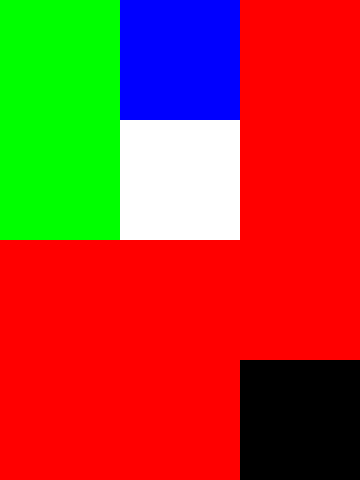

In [72]:
d=pilimg10.resize((int(480/w*h),480))
d

In [92]:
e = PIL.Image.fromarray((c[:,:,::-1]).astype('uint8'), 'RGB')

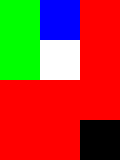

In [96]:
e.resize((120,160))

In [1]:
from chainer import links as L
import chainer.functions as F
import chainer
from chainer import Chain, Link
from chainer import Parameter
from chainer.links import VGG16Layers
from chainer.links.model.vision.vgg import prepare as VGGprepare
from chainer import Variable, optimizers
import numpy as np


In [120]:
a = Variable(np.arange(24,dtype=np.float32).reshape((2,3,4)))

In [121]:
a

variable([[[  0.,   1.,   2.,   3.],
           [  4.,   5.,   6.,   7.],
           [  8.,   9.,  10.,  11.]],

          [[ 12.,  13.,  14.,  15.],
           [ 16.,  17.,  18.,  19.],
           [ 20.,  21.,  22.,  23.]]])

In [122]:
b = 3*a


In [129]:
b.backward()

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [125]:
print(type(b))

<class 'chainer.variable.Variable'>


In [126]:
print(type(a))

<class 'chainer.variable.Variable'>


In [130]:
a.backward()

In [133]:
b.data

array([[[  0.,   3.,   6.,   9.],
        [ 12.,  15.,  18.,  21.],
        [ 24.,  27.,  30.,  33.]],

       [[ 36.,  39.,  42.,  45.],
        [ 48.,  51.,  54.,  57.],
        [ 60.,  63.,  66.,  69.]]], dtype=float32)

In [134]:
b.creator

In [137]:
a.creator

In [155]:
b = a+a

In [140]:
b.cleargrad

<bound method Variable.cleargrad of variable([[[  0.,   3.,   6.,   9.],
           [ 12.,  15.,  18.,  21.],
           [ 24.,  27.,  30.,  33.]],

          [[ 36.,  39.,  42.,  45.],
           [ 48.,  51.,  54.,  57.],
           [ 60.,  63.,  66.,  69.]]])>

In [150]:
b

variable([[[  0.00000000e+00,   1.00000000e+00,   1.60000000e+01,
              8.10000000e+01],
           [  2.56000000e+02,   6.25000000e+02,   1.29600000e+03,
              2.40100000e+03],
           [  4.09600000e+03,   6.56100000e+03,   1.00000000e+04,
              1.46410000e+04]],

          [[  2.07360000e+04,   2.85610000e+04,   3.84160000e+04,
              5.06250000e+04],
           [  6.55360000e+04,   8.35210000e+04,   1.04976000e+05,
              1.30321000e+05],
           [  1.60000000e+05,   1.94481000e+05,   2.34256000e+05,
              2.79841000e+05]]])

In [151]:
c.grad

In [156]:
c.backward()

In [18]:
b.grad

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]], dtype=float32)

In [19]:
a.grad

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]], dtype=float32)

In [22]:
c = b.data.flatten()

In [157]:
b = Variable(np.array([1,2,3],dtype="f"))

In [158]:
c = Variable(np.array([3,2,1],dtype="f"))

In [160]:
a =F.mean_squared_error(b,c)

In [169]:
e = F.mean_squared_error(b,d)

InvalidType: 
Invalid operation is performed in: MeanSquaredError (Forward)

Expect: in_types[1].dtype == <class 'numpy.float32'>
Actual: int64 != <class 'numpy.float32'>

In [182]:
b.data

array([ 3.], dtype=float32)

In [183]:
d.data

In [187]:
d.dot(d)

14

In [188]:
d.dot(d).data

In [189]:
d.dot(e)

NameError: name 'e' is not defined

In [176]:
b.data

array([ 3.], dtype=float32)

In [177]:
b * 3.0

variable([ 9.])

In [178]:
c = b * b

In [200]:
d.dot(d.T)

14

In [195]:
e = Variable(d)

In [208]:
F.mean_squared_error()

variable([3, 2, 1])

InvalidType: 
Invalid operation is performed in: MeanSquaredError (Forward)

Expect: in_types[0].dtype == <class 'numpy.float32'>
Actual: int64 != <class 'numpy.float32'>

In [39]:
a.grad

array(9.0, dtype=float32)

In [40]:
c.grad

array(1.0, dtype=float32)

In [41]:
b.grad

In [43]:
b

variable(14.0)

In [44]:
c = a + b

In [45]:
c

variable(18.0)

In [46]:
c.creator

In [47]:
c.grad

In [48]:
c.backward()

In [49]:
c.grad

array(1.0, dtype=float32)

In [50]:
b.grad

In [51]:
a.grad

array(13.0, dtype=float32)

In [52]:
a = 2*a

In [53]:
a.grad

In [54]:
b.grad

In [55]:
c.grad

array(1.0, dtype=float32)

In [56]:
c.backward()

In [57]:
c.grad

array(1.0, dtype=float32)

In [58]:
a.grad

In [59]:
a.zerograd()

In [60]:
a.grad

array(0.0, dtype=float32)

In [69]:
x_data = np.array([5], dtype=np.float32)

In [70]:
x = Variable(x_data)

In [71]:
y = x**2 - 2 * x + 1 

In [72]:
y.data

array([ 16.], dtype=float32)

In [74]:
y.grad

In [75]:
b  = y

In [82]:
b.data

array([ 16.], dtype=float32)

In [78]:
b = y

In [83]:
b.backward()

In [84]:
y.grad

array([ 1.], dtype=float32)

In [85]:
x.grad

array([ 8.], dtype=float32)

In [86]:
c.grad

In [87]:
c = b * b

In [88]:
c.backward()

In [89]:
b.grad

In [90]:
b.grad

In [91]:
y = x**2 - 2*x +1

In [92]:
y

variable([ 16.])

In [93]:
x

variable([ 5.])

In [94]:
y.backward()

In [95]:
x.grad

array([ 272.], dtype=float32)

In [96]:
b.grad

In [97]:
b =  x**2 - 2*x +1

In [98]:
b.backward()

In [99]:
b.grad

array([ 1.], dtype=float32)

In [100]:
y.grad

array([ 1.], dtype=float32)

In [101]:
x.grad

array([ 280.], dtype=float32)

In [102]:
y = x*x - 2*x +1

In [103]:
y.backward()

In [104]:
y.grad

array([ 1.], dtype=float32)

In [105]:
x.grad

array([ 288.], dtype=float32)

In [106]:
b =  x*x - 2*x +1

In [107]:
b.backward()

In [108]:
x.grad

array([ 296.], dtype=float32)

In [109]:
b.grad

array([ 1.], dtype=float32)

In [110]:
b = c*c

In [111]:
b.backward()

In [112]:
b.grad

array([ 1.], dtype=float32)

In [113]:
c.grad

In [114]:
y = c*c

In [115]:
y.grad

In [116]:
c.grad

In [117]:
y.backward()

In [118]:
c.grad

In [119]:
c

variable([ 256.])